In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11795,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.977912e+07,1.977912e+07,False,NaN,1,NaN,NaN,None,2024-11-07T19:58:00.000Z,76538.152146,6.585659e+10,-42.3107,-0.117188,0.993173,9.051168,22.871020,40.853200,26.050296,1.513857e+12,60.2491,1.607301e+12,None,2024-11-07T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:04:38.882760
1,1027,Ethereum,ETH,ethereum,9488,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204193e+08,1.204193e+08,True,NaN,2,NaN,NaN,None,2024-11-07T19:58:00.000Z,2885.026622,3.557174e+10,-9.3195,0.110105,7.375890,14.818132,18.177250,26.982324,11.192961,3.474129e+11,13.8265,3.474129e+11,None,2024-11-07T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:04:38.882760
2,825,Tether USDt,USDT,tether,102606,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.213787e+11,1.228363e+11,True,NaN,3,NaN,NaN,None,2024-11-07T19:58:00.000Z,1.000963,1.161948e+11,-29.8577,0.033407,-0.025074,0.230769,0.151881,0.100471,0.057790,1.214955e+11,4.8578,1.229545e+11,None,2024-11-07T19:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-07 20:04:38.882760
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.715717e+08,5.879469e+08,True,NaN,4,NaN,NaN,None,2024-11-07T19:58:00.000Z,196.587979,5.056628e+09,-46.2935,-0.200871,4.447713,16.577826,36.629460,52.666860,27.879988,9.270532e+10,3.7067,1.155833e+11,None,2024-11-07T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:04:38.882760
4,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440996e+08,1.440996e+08,False,NaN,5,NaN,NaN,None,2024-11-07T19:58:00.000Z,598.992896,1.980822e+09,-12.4160,-0.129749,1.761862,4.465434,2.249126,20.876574,18.136874,8.631462e+10,3.4512,8.631462e+10,None,2024-11-07T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:04:38.882760
5,3408,USDC,USDC,usd-coin,22896,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.676387e+10,3.676387e+10,False,NaN,6,NaN,NaN,None,2024-11-07T19:58:00.000Z,0.999902,1.185752e+10,-32.9892,0.013500,-0.017155,0.014664,0.006528,-0.007073,-0.021256,3.676026e+10,1.4628,3.676026e+10,None,2024-11-07T19:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-07 20:04:38.882760
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.686866e+10,9.998704e+10,False,NaN,7,NaN,NaN,None,2024-11-07T19:58:00.000Z,0.555202,2.000597e+09,-3.5029,0.126822,3.510866,9.596281,4.744685,5.631019,-4.678176,3.157359e+10,1.2564,5.552019e+10,None,2024-11-07T19:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:04:38.882760
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.466958e+11,1.466958e+11,True,NaN,8,NaN,NaN,None,2024-11-07T19:57:00.000Z,0.193769,4.768674e+09,-60.4484,-0.447329,-0.726209,21.776534,80.781651,103.110875,87.423429,2.842517e+10,1.1313,2.842517e+10,None,2024-11-07T19:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:04:38.882760
8,1958,TRON,TRX,tron,1063,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.642816e+10,8.64

In [42]:
import os
import pandas as pd
from time import sleep
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Boş bir DataFrame başlatın
df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return

    # Yeni veri çek ve zaman bilgisini ekle
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')

    # `pd.concat()` kullanarak `df` ile `df2`yi birleştir
    df = pd.concat([df, df2], ignore_index=True)

# Veri çekme döngüsü
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)  # 1 dakika bekle


API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [44]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11795,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19779134.00000,19779134.00000,False,NaN,1,NaN,NaN,None,2024-11-07T20:36:00.000Z,76708.78389,65066394334.10370,-43.37120,0.48922,1.29748,9.42028,23.23195,41.39620,26.11300,1517233315505.95850,60.27540,1610884461656.66992,None,2024-11-07T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:37:46.159217
1,1027,Ethereum,ETH,ethereum,9488,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120419290.02894,120419290.02894,True,NaN,2,NaN,NaN,None,2024-11-07T20:36:00.000Z,2891.51126,35607238549.12809,-9.60670,0.70706,8.01064,14.78057,18.58338,27.37447,11.07589,348193732530.12341,13.83270,348193732530.12000,None,2024-11-07T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:37:46.159217
2,825,Tether USDt,USDT,tether,102606,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,121378654700.61101,122836276432.55733,True,NaN,3,NaN,NaN,None,2024-11-07T20:36:00.000Z,1.00146,115502729358.47557,-30.58650,0.05966,0.02472,0.26367,0.20678,0.14707,0.09517,121555903311.13882,4.82910,123015653600.42999,None,2024-11-07T20:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-07 20:37:46.159217
3,5426,Solana,SOL,solana,779,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,471570441.19773,587946270.48803,True,NaN,4,NaN,NaN,None,2024-11-07T20:36:00.000Z,196.90561,5021281435.15779,-46.57520,0.62088,4.72035,16.07071,36.78142,53.11154,28.11147,92854865471.96301,3.68890,115769919149.82001,None,2024-11-07T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:37:46.159217
4,1839,BNB,BNB,bnb,2273,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144099567.33797,144099567.33797,False,NaN,5,NaN,NaN,None,2024-11-07T20:36:00.000Z,600.75916,1986339161.09416,-12.37210,0.34985,2.11136,4.59792,3.00217,21.25001,18.13837,86569135309.12328,3.43910,86569135309.12000,None,2024-11-07T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:37:46.159217
5,3408,USDC,USDC,usd-coin,22898,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36774272059.92513,36774272059.92513,False,NaN,6,NaN,NaN,None,2024-11-07T20:36:00.000Z,1.00011,11663105637.24943,-34.67430,0.01688,0.01271,0.00713,0.01869,0.01102,-0.00983,36778315048.04649,1.46710,36778315048.05000,None,2024-11-07T20:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-07 20:37:46.159217
6,52,XRP,XRP,xrp,1414,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56868662755.00000,99987041380.00000,False,NaN,7,NaN,NaN,None,2024-11-07T20:36:00.000Z,0.55728,1967831602.75867,-6.16700,0.47543,2.98706,9.66593,4.99376,6.18143,-3.76841,31691921625.60229,1.26420,55728269472.66000,None,2024-11-07T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-07 20:37:46.159217
7,74,Dogecoin,DOGE,dogecoin,1093,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146696376383.70526,146696376383.70526,True,NaN,8,NaN,NaN,None,2024-11-07T20:35:00.000Z,0.19332,4669852555.51513,-61.05640,-0.02464,-0.83457,20.70585,80.20774,103.19512,85.91181,28358936638.71791,1.12600,28358936638.72000,None,2024-11-07T20:35:00.000Z,NaN,NaN,N

In [45]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.29348,1.19985,9.28655,23.07580,41.21705,25.92220
Ethereum,0.50889,7.94080,14.67527,18.46705,27.26673,11.00159
Tether USDt,0.02834,0.01600,0.25980,0.19600,0.13147,0.06789
Solana,0.66084,4.82074,16.12946,36.87575,53.22739,28.03144
BNB,0.36175,2.19366,4.61330,3.04606,21.27887,18.13789
USDC,-0.00281,-0.00326,0.00324,0.00976,-0.00604,-0.02241
XRP,0.42575,3.00782,9.60822,4.97430,6.13634,-3.94451
Dogecoin,-0.08506,-0.89712,20.65226,80.12823,103.13308,85.84300
Cardano,1.41766,10.93157,16.16507,15.48048,19.00747,14.12198


In [46]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.29348
              quote.USD.percent_change_24h     1.19985
              quote.USD.percent_change_7d      9.28655
              quote.USD.percent_change_30d    23.07580
              quote.USD.percent_change_60d    41.21705
              quote.USD.percent_change_90d    25.92220
Ethereum      quote.USD.percent_change_1h      0.50889
              quote.USD.percent_change_24h     7.94080
              quote.USD.percent_change_7d     14.67527
              quote.USD.percent_change_30d    18.46705
              quote.USD.percent_change_60d    27.26673
              quote.USD.percent_change_90d    11.00159
Tether USDt   quote.USD.percent_change_1h      0.02834
              quote.USD.percent_change_24h     0.01600
              quote.USD.percent_change_7d      0.25980
              quote.USD.percent_change_30d     0.19600
              quote.USD.percent_change_60d     0.13147
              quote.USD.percent_change_90d     0.06789
Solana        quote.USD.percent_change_1h      0.66084
              quote.USD.percent_change_24h     4.82074
              quote.USD.percent_change_7d     16.12946
              quote.USD.percent_change_30d    36.87575
              quote.USD.percent_change_60d    53.22739
              quote.USD.percent_change_90d    28.03144
BNB           quote.USD.percent_change_1h      0.36175
              quote.USD.percent_change_24h     2.19366
              quote.USD.percent_change_7d      4.61330
              quote.USD.percent_change_30d     3.04606
              quote.USD.percent_change_60d    21.27887
              quote.USD.percent_change_90d    18.13789
USDC          quote.USD.percent_change_1h     -0.00281
              quote.USD.percent_change_24h    -0.00326
              quote.USD.percent_change_7d      0.00324
              quote.USD.percent_change_30d     0.00976
              quote.USD.percent_change_60d    -0.00604
              quote.USD.percent_change_90d    -0.02241
XRP           quote.USD.percent_change_1h      0.42575
              quote.USD.percent_change_24h     3.00782
              quote.USD.percent_change_7d      9.60822
              quote.USD.percent_change_30d     4.97430
              quote.USD.percent_change_60d     6.13634
              quote.USD.percent_change_90d    -3.94451
Dogecoin      quote.USD.percent_change_1h     -0.08506
              quote.USD.percent_change_24h    -0.89712
              quote.USD.percent_change_7d     20.65226
              quote.USD.percent_change_30d    80.12823
              quote.USD.percent_change_60d   103.13308
              quote.USD.percent_change_90d    85.84300
Cardano       quote.USD.percent_change_1h      1.41766
              quote.USD.percent_change_24h    10.93157
              quote.USD.percent_change_7d     16.16507
              quote.USD.percent_change_30d    15.48048
              quote.USD.percent_change_60d    19.00747
              quote.USD.percent_change_90d    14.12198
TRON          quote.USD.percent_change_1h      0.16109
              quote.USD.percent_change_24h    -1.81110
              quote.USD.percent_change_7d     -4.38099
              quote.USD.percent_change_30d     0.29678
              quote.USD.percent_change_60d     5.18977
              quote.USD.percent_change_90d    25.77003
Toncoin       quote.USD.percent_change_1h      0.25711
              quote.USD.percent_change_24h     4.25316
              quote.USD.percent_change_7d      2.58424
              quote.USD.percent_change_30d    -5.51328
              quote.USD.percent_change_60d     1.82536
              quote.USD.percent_change_90d   -25.28022
Avalanche     quote.USD.percent_change_1h      0.10503
              quote.USD.percent_change_24h     3.87149
              quote.USD.percent_change_7d     10.79898
              quote.USD.percent_change_30d     4.10219
              quote.USD.percent_change_60d    20.25463
              quote.USD.percent_change_90d    27.252

In [47]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.29348
             quote.USD.percent_change_24h   1.19985
             quote.USD.percent_change_7d    9.28655
             quote.USD.percent_change_30d  23.07580
             quote.USD.percent_change_60d  41.21705
             quote.USD.percent_change_90d  25.92220
Ethereum     quote.USD.percent_change_1h    0.50889
             quote.USD.percent_change_24h   7.94080
             quote.USD.percent_change_7d   14.67527
             quote.USD.percent_change_30d  18.46705
             quote.USD.percent_change_60d  27.26673
             quote.USD.percent_change_90d  11.00159
Tether USDt  quote.USD.percent_change_1h    0.02834
             quote.USD.percent_change_24h   0.01600
             quote.USD.percent_change_7d    0.25980
             quote.USD.percent_change_30d   0.19600
             quote.USD.percent_change_60d   0.13147
             quote.USD.percent_change_90d   0.06789
Solana       quote.USD.percent_change_1h    0.66084
             quote.USD.percent_change_24h   4.82074
             quote.USD.percent_change_7d   16.12946
             quote.USD.percent_change_30d  36.87575
             quote.USD.percent_change_60d  53.22739
             quote.USD.percent_change_90d  28.03144
BNB          quote.USD.percent_change_1h    0.36175
             quote.USD.percent_change_24h   2.19366
             quote.USD.percent_change_7d    4.61330
             quote.USD.percent_change_30d   3.04606
             quote.USD.percent_change_60d  21.27887
             quote.USD.percent_change_90d  18.13789
USDC         quote.USD.percent_change_1h   -0.00281
             quote.USD.percent_change_24h  -0.00326
             quote.USD.percent_change_7d    0.00324
             quote.USD.percent_change_30d   0.00976
             quote.USD.percent_change_60d  -0.00604
             quote.USD.percent_change_90d  -0.02241
XRP          quote.USD.percent_change_1h    0.42575
             quote.USD.percent_change_24h   3.00782
             quote.USD.percent_change_7d    9.60822
             quote.USD.percent_change_30d   4.97430
             quote.USD.percent_change_60d   6.13634
             quote.USD.percent_change_90d  -3.94451
Dogecoin     quote.USD.percent_change_1h   -0.08506
             quote.USD.percent_change_24h  -0.89712
             quote.USD.percent_change_7d   20.65226
             quote.USD.percent_change_30d  80.12823
             quote.USD.percent_change_60d 103.13308
             quote.USD.percent_change_90d  85.84300
Cardano      quote.USD.percent_change_1h    1.41766
             quote.USD.percent_change_24h  10.93157
             quote.USD.percent_change_7d   16.16507
             quote.USD.percent_change_30d  15.48048
             quote.USD.percent_change_60d  19.00747
             quote.USD.percent_change_90d  14.12198
TRON         quote.USD.percent_change_1h    0.16109
             quote.USD.percent_change_24h  -1.81110
             quote.USD.percent_change_7d   -4.38099
             quote.USD.percent_change_30d   0.29678
             quote.USD.percent_change_60d   5.18977
             quote.USD.percent_change_90d  25.77003
Toncoin      quote.USD.percent_change_1h    0.25711
             quote.USD.percent_change_24h   4.25316
             quote.USD.percent_change_7d    2.58424
             quote.USD.percent_change_30d  -5.51328
             quote.USD.percent_change_60d   1.82536
             quote.USD.percent_change_90d -25.28022
Avalanche    quote.USD.percent_change_1h    0.10503
             quote.USD.percent_change_24h   3.87149
             quote.USD.percent_change_7d   10.79898
             quote.USD.percent_change_30d   4.10219
             quote.USD.percent_change_60d  20.25463
             quote.USD.percent_change_90d  27.25244
Shiba Inu    quote.USD.percent_change_1h    0.47983
             quote.USD.percent_change_24h   0.70605
             quote.USD.percent_change_7d    5.94623
             quote.USD.percent_change_30d

In [57]:
df5 = df4.to_frame(name='values').reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.29348
1,Bitcoin,quote.USD.percent_change_24h,1.19985
2,Bitcoin,quote.USD.percent_change_7d,9.28655
3,Bitcoin,quote.USD.percent_change_30d,23.07580
4,Bitcoin,quote.USD.percent_change_60d,41.21705
5,Bitcoin,quote.USD.percent_change_90d,25.92220
6,Ethereum,quote.USD.percent_change_1h,0.50889
7,Ethereum,quote.USD.percent_change_24h,7.94080
8,Ethereum,quote.USD.percent_change_7d,14.67527
9,Ethereum,quote.USD.percent_change_30d,18.46705


In [58]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.29348
1,Bitcoin,quote.USD.percent_change_24h,1.19985
2,Bitcoin,quote.USD.percent_change_7d,9.28655
3,Bitcoin,quote.USD.percent_change_30d,23.07580
4,Bitcoin,quote.USD.percent_change_60d,41.21705
5,Bitcoin,quote.USD.percent_change_90d,25.92220
6,Ethereum,quote.USD.percent_change_1h,0.50889
7,Ethereum,quote.USD.percent_change_24h,7.94080
8,Ethereum,quote.USD.percent_change_7d,14.67527
9,Ethereum,quote.USD.percent_change_30d,18.46705


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

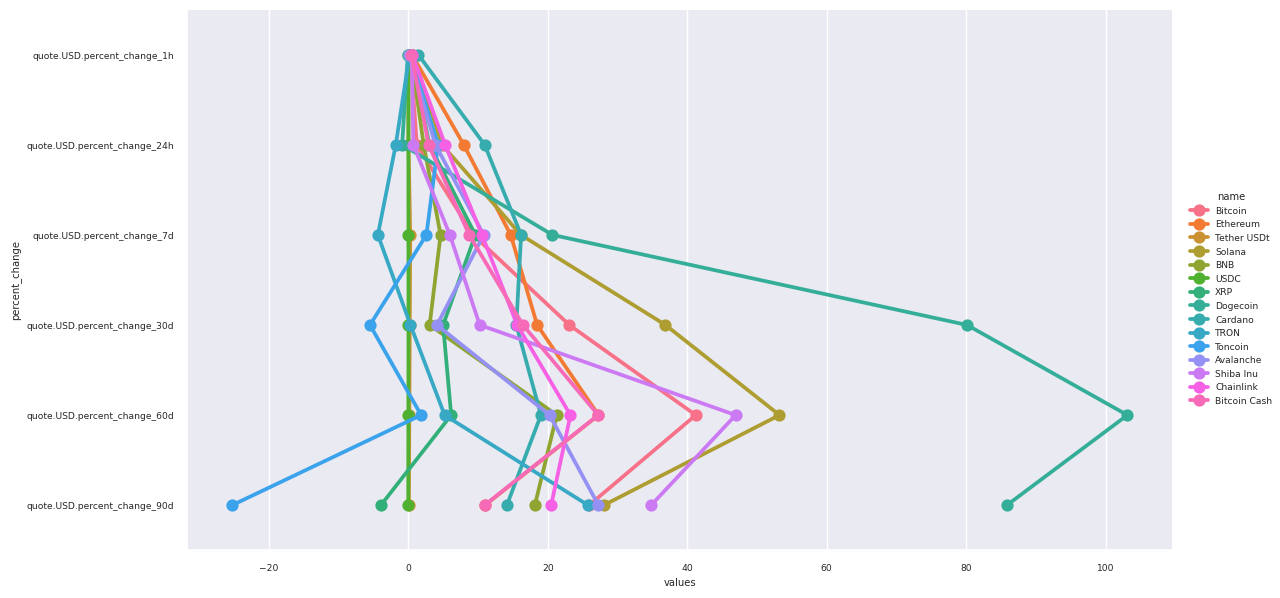

In [75]:
 sns.catplot(
    y='percent_change', x='values', hue='name', data=df6, kind='point',
    aspect=2,
    height=6
)

